<a href="https://colab.research.google.com/github/RashikaTyagi01/Rashika-UML501/blob/main/mlAssignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) The Iris dataset is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width). Use SVC from sklearn.svm on the Iris dataset and follow the steps below:
a) Load the dataset and perform train–test split (80:20).
b) Train three different SVM models using the following kernels:
Linear, Polynomial (degree=3), RBF
c) Evaluate each model using:
Accuracy
Precision
Recall
F1-Score
d) Display the confusion matrix for each kernel.
e) Identify which kernel performs the best and why.


In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [31]:
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [32]:
X=iris.data
y=iris.target
X.shape

(150, 4)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

Linear Kernel

For Linear Kernel:

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0
confusion matrix: 



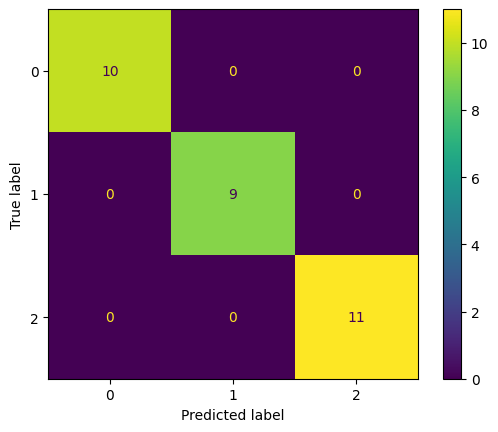

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred_linear=svm_linear.predict(X_test)
print('For Linear Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred_linear))
print('precision: ',precision_score(y_test,y_pred_linear, average='macro'))
print('recall: ',recall_score(y_test,y_pred_linear, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred_linear, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linear))
disp.plot()
plt.show()

Polynomial Kernel (degree=3)

For Polynomial Kernel:

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0
confusion matrix: 



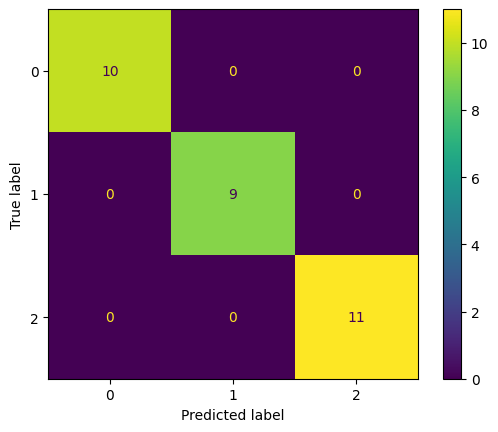

In [35]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred_poly=svm_poly.predict(X_test)
print('For Polynomial Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred_poly))
print('precision: ',precision_score(y_test,y_pred_poly, average='macro'))
print('recall: ',recall_score(y_test,y_pred_poly, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred_poly, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_poly))
disp.plot()
plt.show()

RBF Kernel

For RBF Kernel:

accuracy:  1.0
precision:  1.0
recall:  1.0
f1 score:  1.0
confusion matrix: 



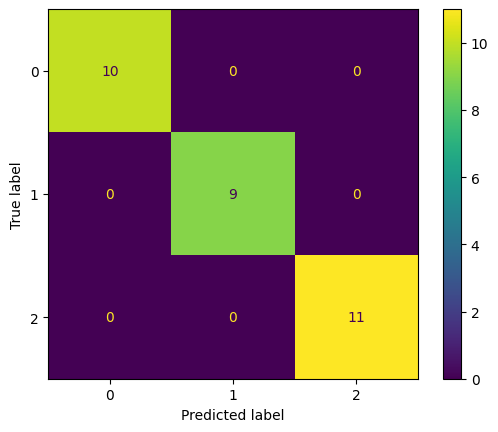

In [36]:
svm_rbf=SVC(kernel='rbf')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)
print('For RBF Kernel:\n')
print('accuracy: ',accuracy_score(y_test,y_pred_rbf))
print('precision: ',precision_score(y_test,y_pred_rbf, average='macro'))
print('recall: ',recall_score(y_test,y_pred_rbf, average='macro'))
print('f1 score: ',f1_score(y_test,y_pred_rbf, average='macro'))
print('confusion matrix: \n')
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf))
disp.plot()
plt.show()

In [37]:
model = SVC(probability=True)
model.fit(X_train,y_train)

SVC(probability=True)

In [39]:
def predict_flower(sepal_length, sepal_width, petal_length, petal_width):
    df = pd.DataFrame.from_dict({'Sepal Length':[sepal_length],
                                  'Sepal Width': [sepal_width],
                                 'Petal Length': [petal_length],
                                  'Petal Width': [petal_width]
    })
    predict = model.predict_proba(df)[0]
    return {model.classes_[i]: predict[i] for i in range(3)}

2) SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.

A) Use the Breast Cancer dataset from sklearn.datasets.load_breast_cancer.
B) Train an SVM (RBF kernel) model with and without feature scaling (StandardScaler). Compare both results using:
Training accuracy
Testing accuracy
C) Discuss the effect of feature scaling on SVM performance.


In [40]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target
X.shape
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

without feature scaling

SVM (RBF) WITHOUT Scaling:
Training Accuracy: 0.9142857142857143
Testing Accuracy : 0.9473684210526315


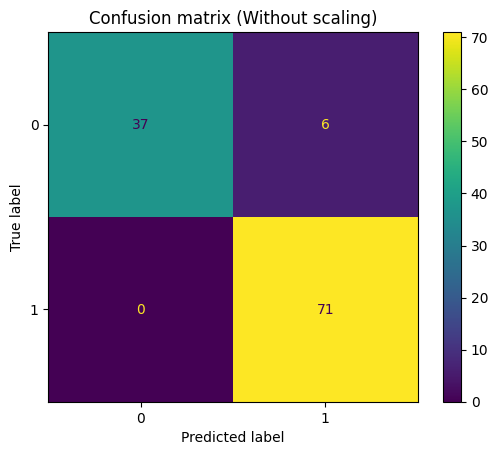

In [41]:
svm_no_scaling = SVC(kernel='rbf', random_state=42)
svm_no_scaling.fit(X_train, y_train)
y_train_pred = svm_no_scaling.predict(X_train)
y_test_pred = svm_no_scaling.predict(X_test)
print("SVM (RBF) WITHOUT Scaling:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy :", accuracy_score(y_test, y_test_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred))
disp.plot()
plt.title("Confusion matrix (Without scaling)")
plt.show()

with feature scaling

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)





SVM (RBF) with scaling:
Training Accuracy: 0.989010989010989
Testing Accuracy : 0.9824561403508771


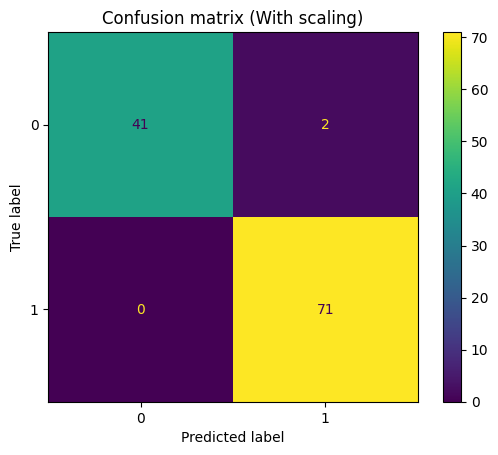

In [43]:
svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_train_pred_scaled = svm_scaled.predict(X_train_scaled)
y_test_pred_scaled = svm_scaled.predict(X_test_scaled)
print("\nSVM (RBF) with scaling:")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_scaled))
print("Testing Accuracy :", accuracy_score(y_test, y_test_pred_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_scaled))
disp.plot()
plt.title("Confusion matrix (With scaling)")
plt.show()

Effect of feature scaling on SVM performance:
Without scaling, features with larger ranges dominate the distance computations, leading to poor or inconsistent accuracy.
With scaling (StandardScaler), all features contribute equally, improving training and testing accuracy, especially for RBF kernel which is distance-based.